<font color="purple" face="Comic Sans MS,arial">
  <h1 align="center"><i>Proyecto Final</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M. en C. Miguel Angel Pérez León</i></h5>
    <h5 align="center"><i>Alumno: Vargas Bautista Emmanuel</i></h5>
  <h5 align="center"><i>Materia: Manejo de Datos</i></h5>
  </font>

# Paso 1 - Configurar nuestro entorno para el proyecto

In [ ]:
# Paso 1 - Configurar nuestro entorno

# Importar bibliotecas de PyTorch
import torch
from torch import nn

# Importar biblioteca de visualización
import matplotlib.pyplot as plt

# Verificar la versión de PyTorch
print('Versión de PyTorch:', torch.__version__)

# Paso 2 - Verificar la capacidad de procesamiento (CPU vs GPU)

# Verificar si hay una GPU disponible
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Se detectó un dispositivo {}.'.format(device))

# Imprimir el nombre del dispositivo CUDA, si está disponible
if device == 'cuda':
    print('Nombre del dispositivo CUDA:', torch.cuda.get_device_name(device=device))

Versión de PyTorch: 2.1.0+cu121
Se detectó un dispositivo cuda.
Nombre del dispositivo CUDA: Tesla T4


# Paso 2 - Conexion a la base de datos y preparacion de los datos

In [ ]:
!pip install mysql-connector-python
# se importa la biblioteca necesaria
import mysql.connector
import pandas as pd
import warnings
# asignamos las credenciales de conexion y se establece la conexion
host='hpc-matematicas-z.fciencias.unam.mx'
user='JimmyNeutron'
password='CarlSheen'
database='LIMONADA'
# se establece la conexión a la base de datos
con = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

  Using cached mysql_connector_python-8.2.0-cp311-cp311-manylinux_2_17_x86_64.whl.metadata (2.1 kB)
  Using cached protobuf-4.21.12-cp37-abi3-manylinux2014_x86_64.whl (409 kB)
Using cached mysql_connector_python-8.2.0-cp311-cp311-manylinux_2_17_x86_64.whl (31.6 MB)


## Cargar los datos

In [ ]:

# Consulta SQL para seleccionar todos los datos de la tabla "ventas_limones"
query = "SELECT * FROM VENTAS"

# Cargar los datos desde la base de datos en un DataFrame de Pandas
df = pd.read_sql(query, con)

# Explorar las primeras 10 filas del conjunto de datos
df.head(10)

# Verificar el tamaño/forma de nuestro conjunto de datos
#df.shape


/tmp/ipykernel_185/2199681574.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con)


,id_venta,fin_semana,soleado,caluroso,quincena,precio,vendidos
0,1,1,0,0,1,9.0,71.0
1,2,1,1,1,0,10.0,137.0
2,3,0,1,0,0,10.0,0.0
3,4,1,0,0,1,6.0,107.0
4,5,1,0,0,1,8.0,80.0
5,6,1,1,0,0,6.0,110.0
6,7,1,1,1,0,8.0,167.0
7,8,0,0,1,1,8.0,0.0
8,9,1,0,1,0,8.0,124.0
9,10,1,1,0,0,7.0,95.0


## Estandarizacion

In [ ]:

# Estandarizar las columnas 'Price' y 'NumberSold'
price_mean = df['precio'].mean()
price_std = df['precio'].std()
df['precio'] = (df['precio'] - price_mean) / price_std

num_sold_mean = df['vendidos'].mean()
num_sold_std = df['vendidos'].std()
df['vendidos'] = (df['vendidos'] - num_sold_mean) / num_sold_std

# Crear tensores de PyTorch y moverlos a la CPU o GPU si está disponible
inputs = ['fin_semana', 'soleado', 'caluroso', 'quincena', 'precio']
x = torch.tensor(df[inputs].values, dtype=torch.float)

outputs = ['vendidos']
y = torch.tensor(df[outputs].values, dtype=torch.float)

# Explorar las primeras 5 entradas y salidas
print("Primeras 5 entradas:")
print(x[0:5])

print("\nPrimeras 5 salidas:")
print(y[0:5])

#Visualisar los datos estandarizados
df.head(10)


Primeras 5 entradas:
tensor([[ 1.0000,  0.0000,  0.0000,  1.0000,  0.8467],
        [ 1.0000,  1.0000,  1.0000,  0.0000,  1.4526],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  1.4526],
        [ 1.0000,  0.0000,  0.0000,  1.0000, -0.9712],
        [ 1.0000,  0.0000,  0.0000,  1.0000,  0.2407]])

Primeras 5 salidas:
tensor([[-0.0237],
        [ 0.7437],
        [-0.8492],
        [ 0.3949],
        [ 0.0810]])


,id_venta,fin_semana,soleado,caluroso,quincena,precio,vendidos
0,1,1,0,0,1,0.846650,-0.023669
1,2,1,1,1,0,1.452587,0.743734
2,3,0,1,0,0,1.452587,-0.849208
3,4,1,0,0,1,-0.971158,0.394915
4,5,1,0,0,1,0.240714,0.080977
5,6,1,1,0,0,-0.971158,0.429797
6,7,1,1,1,0,0.240714,1.092554
7,8,0,0,1,1,0.240714,-0.849208
8,9,1,0,1,0,0.240714,0.592579
9,10,1,1,0,0,-0.365222,0.255387


# Construir la red neuronal

In [ ]:
import torch
import torch.nn as nn

# Define tu red neuronal en PyTorch
# Número de entradas: 5
# Número de unidades ocultas: 100
# Número de capas ocultas: 1
# Función de activación: ReLU
# Número de salidas: 1

model = nn.Sequential(
    nn.Linear(5, 100),
    nn.ReLU(),
    nn.Linear(100, 1)
)

# Mueve el modelo a la CPU o GPU según la disponibilidad
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Sequential(
  (0): Linear(in_features=5, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

## Entrenamiento

In [ ]:
import torch.optim as optim

# Medir nuestra red neuronal mediante el error cuadrático medio (MSE)
criterion = torch.nn.MSELoss()

# Entrenar nuestra red con un optimizador SGD simple
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Entrenar nuestra red utilizando el conjunto de datos completo 5 veces (5 épocas)
for epoch in range(5):
    total_loss = 0

    # Iterar sobre cada ejemplo en el conjunto de datos
    for i in range(len(x)):
        # Pase hacia adelante único (Forward Pass)
        y_pred = model(x[i])

        # Medir qué tan bien el modelo predijo en comparación con el valor real
        loss = criterion(y_pred, y[i])

        # Seguir qué tan bien el modelo predijo (llamado pérdida)
        total_loss += loss.item()

        # Actualizar la red neuronal (Backward Pass y Optimización)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Imprimir nuestra pérdida después de cada iteración de entrenamiento
    print("Época {}, Pérdida Total: {:.4f}".format(epoch + 1, total_loss))


Época 1, Pérdida Total: 91.6505
Época 2, Pérdida Total: 11.5847
Época 3, Pérdida Total: 6.8408
Época 4, Pérdida Total: 5.6437
Época 5, Pérdida Total: 4.7520


## Analisis de los resultados

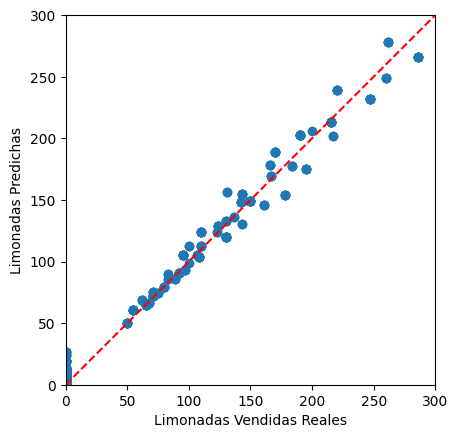

In [ ]:
import matplotlib.pyplot as plt

@torch.no_grad()
def graphPredictions(model, x, y, minValue, maxValue):
    model.eval()  # Establecer el modelo en modo de inferencia

    predictions = []  # Seguimiento de las predicciones
    actual = []  # Seguimiento de las etiquetas reales

    x.to(device)
    y.to(device)
    model.to(device)

    for i in range(len(x)):
        # Pase hacia adelante único (sin cálculo de gradientes)
        pred = model(x[i])

        # Desnormalizar la predicción
        pred = pred * num_sold_std + num_sold_mean
        act = y[i] * num_sold_std + num_sold_mean

        # Guardar la predicción y la etiqueta real
        predictions.append(pred.tolist())
        actual.append(act.item())

    # Graficar reales vs predicciones
    plt.scatter(actual, predictions)
    plt.xlabel('Limonadas Vendidas Reales')
    plt.ylabel('Limonadas Predichas')
    plt.plot([minValue, maxValue], [minValue, maxValue], linestyle='--', color='red')  # Línea de referencia (y=x)
    plt.xlim(minValue, maxValue)
    plt.ylim(minValue, maxValue)

    # Ajustar la visualización para que sea igual en ambas dimensiones
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Llamar a la función para graficar las predicciones
graphPredictions(model, x, y, 0, 300)


# Vercion un poco mejorada

Para mejorar un poco mas la creacion de la red neuronal lo primero que podemos hacer es modificar la arquitectura de la red de tal manera que vamos a experimentar con arquitecturas de red más complejas o más simples según el tamaño de los datos y la complejidad del problema. Podemos agregar capas, cambiar el número de unidades ocultas o probar diferentes funciones de activación.

Algunas cosas que ademas hice fue:

- Dividir el conjunto de datos en un conjunto de entrenamiento, validación y prueba

- Experimentar con diferentes tasas de aprendizaje para encontrar el valor que funcione mejor para tu problema. Puedes probar con valores más pequeños o más grandes para observar cómo afectan el rendimiento de la red.




In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Supongamos que tienes tensores de entrada (x) y etiquetas (y)
# x e y deben ser tensores de PyTorch

# Dividir los datos en entrenamiento, validación y prueba
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Convertir datos a tensores de PyTorch
x_train, y_train = torch.tensor(x_train), torch.tensor(y_train)
x_val, y_val = torch.tensor(x_val), torch.tensor(y_val)
x_test, y_test = torch.tensor(x_test), torch.tensor(y_test)

# Crear conjuntos de datos y dataloaders
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)
test_dataset = TensorDataset(x_test, y_test)

batch_size = 4  # ajusta según tus necesidades
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

/tmp/ipykernel_185/4226329835.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train, y_train = torch.tensor(x_train), torch.tensor(y_train)
/tmp/ipykernel_185/4226329835.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_val, y_val = torch.tensor(x_val), torch.tensor(y_val)
/tmp/ipykernel_185/4226329835.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test, y_test = torch.tensor(x_test), torch.tensor(y_test)


In [ ]:
import torch
import torch.nn as nn

# Define tu red neuronal en PyTorch
# Número de entradas: 5
# Número de unidades ocultas: 100
# Número de capas ocultas: 1
# Función de activación: ReLU
# Número de salidas: 1

# Define tu red neuronal en PyTorch
model = nn.Sequential(
    nn.Linear(5, 100),
    nn.ReLU(),
    nn.Linear(100, 50),  # Agregar una capa adicional
    nn.ReLU(),
    nn.Linear(50, 1)
)


# Mueve el modelo a la CPU o GPU según la disponibilidad
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Sequential(
  (0): Linear(in_features=5, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
# Medir nuestra red neuronal mediante el error cuadrático medio (MSE)
criterion = torch.nn.MSELoss()

# Entrenar nuestra red con un optimizador SGD simple
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Entrenar nuestra red utilizando el conjunto de datos completo 5 veces (5 épocas)
for epoch in range(50):
    total_loss = 0

    # Iterar sobre cada lote en el conjunto de entrenamiento
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Pase hacia adelante único (Forward Pass)
        y_pred = model(inputs)

        # Medir qué tan bien el modelo predijo en comparación con el valor real
        loss = criterion(y_pred, labels)

        # Seguir qué tan bien el modelo predijo (llamado pérdida)
        total_loss += loss.item()

        # Actualizar la red neuronal (Backward Pass y Optimización)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Imprimir nuestra pérdida después de cada iteración de entrenamiento
    print("Época {}, Pérdida Total: {:.4f}".format(epoch + 1, total_loss))


Época 1, Pérdida Total: 27.6446
Época 2, Pérdida Total: 5.2237
Época 3, Pérdida Total: 0.9940
Época 4, Pérdida Total: 0.7804
Época 5, Pérdida Total: 0.7002
Época 6, Pérdida Total: 0.4112
Época 7, Pérdida Total: 0.3315
Época 8, Pérdida Total: 0.1823
Época 9, Pérdida Total: 0.1503
Época 10, Pérdida Total: 0.0915
Época 11, Pérdida Total: 0.1990
Época 12, Pérdida Total: 0.0970
Época 13, Pérdida Total: 0.0901
Época 14, Pérdida Total: 0.0713
Época 15, Pérdida Total: 0.0573
Época 16, Pérdida Total: 0.0748
Época 17, Pérdida Total: 0.0311
Época 18, Pérdida Total: 0.0586
Época 19, Pérdida Total: 0.0354
Época 20, Pérdida Total: 0.0237
Época 21, Pérdida Total: 0.0178
Época 22, Pérdida Total: 0.0414
Época 23, Pérdida Total: 0.0248
Época 24, Pérdida Total: 0.0231
Época 25, Pérdida Total: 0.0160
Época 26, Pérdida Total: 0.0151
Época 27, Pérdida Total: 0.0097
Época 28, Pérdida Total: 0.0109
Época 29, Pérdida Total: 0.0189
Época 30, Pérdida Total: 0.0115
Época 31, Pérdida Total: 0.0057
Época 32, Pérdid

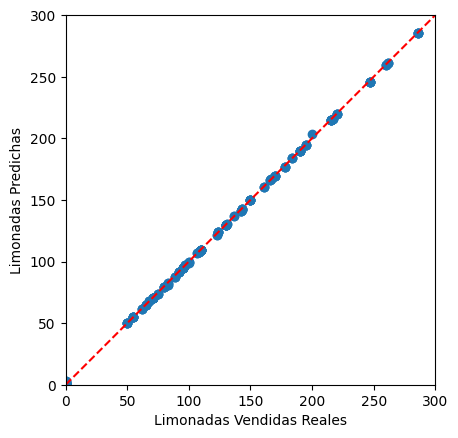

In [ ]:
import matplotlib.pyplot as plt

@torch.no_grad()
def graphPredictions(model, x, y, minValue, maxValue, num_sold_mean, num_sold_std):
    model.eval()  # Establecer el modelo en modo de inferencia

    predictions = []  # Seguimiento de las predicciones
    actual = []  # Seguimiento de las etiquetas reales

    # Mover tensores al dispositivo
    x = x.to(device)
    y = y.to(device)
    model.to(device)

    for i in range(len(x)):
        # Pase hacia adelante único (sin cálculo de gradientes)
        pred = model(x[i])

        # Desnormalizar la predicción y la etiqueta real
        pred = pred * num_sold_std + num_sold_mean
        act = y[i] * num_sold_std + num_sold_mean

        # Guardar la predicción y la etiqueta real
        predictions.append(pred.item())
        actual.append(act.item())

    # Graficar reales vs predicciones
    plt.scatter(actual, predictions)
    plt.xlabel('Limonadas Vendidas Reales')
    plt.ylabel('Limonadas Predichas')
    plt.plot([minValue, maxValue], [minValue, maxValue], linestyle='--', color='red')  # Línea de referencia (y=x)
    plt.xlim(minValue, maxValue)
    plt.ylim(minValue, maxValue)

    # Ajustar la visualización para que sea igual en ambas dimensiones
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Llamar a la función para graficar las predicciones
graphPredictions(model, x, y, 0, 300, num_sold_mean, num_sold_std)


# Crear el Json

In [ ]:
import json

# Obtener las predicciones y datos reales
predictions = []
for i in range(len(y)):
    # Pase hacia adelante único para obtener la predicción
    pred = model(x[i].unsqueeze(0).to(device)).item()

    # Desnormalizar la predicción y el dato real
    pred = pred * num_sold_std + num_sold_mean
    actual_value = y[i] * num_sold_std + num_sold_mean

    # Crear el diccionario de predicción
    prediction_data = {
        "dato": i,
        "red neuronal": pred,
        "dato real": actual_value.item()
    }

    # Agregar el diccionario a la lista de predicciones
    predictions.append(prediction_data)

# Crear el diccionario final
result_dict = {"predicciones": predictions}

# Guardar el diccionario en un archivo JSON
with open("Predicciones.json", "w") as json_file:
    json.dump(result_dict, json_file, indent=2)

print("Archivo 'Predicciones.json' generado con éxito.")


Archivo 'Predicciones.json' generado con éxito.
